In [35]:
# In Part_B I used ChatGPT...
# I knew that there must be libraries that simplify working with graph structures.
# So it turns out that NetworkX is that go-to tool.
# And with couple of tries I managed to get the result.
# (I admit I probably wouldn't be able to write the algorithm myself.  
# But still I feel I learned something new: my first experience with the NetworkX library!)

In [36]:
# I will use the example data, for demonstration purposes.

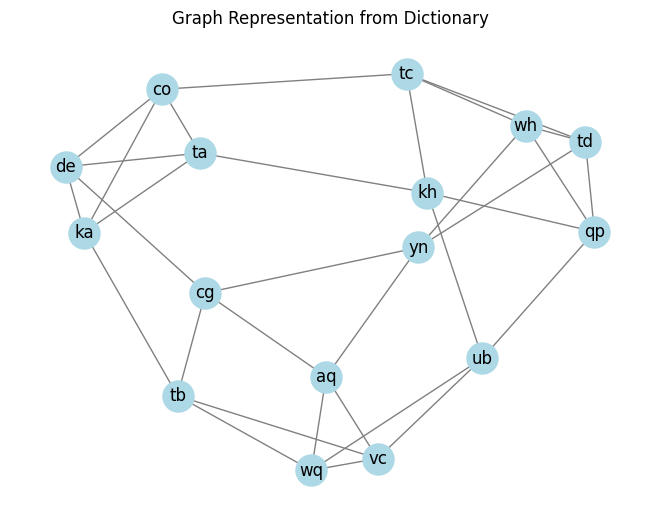

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

# Dictionary representing the graph (this is essentialy from my_dict variable from Part_A)
graph_dict = {
    'aq': ['cg', 'vc', 'wq', 'yn'], 
    'cg': ['aq', 'de', 'tb', 'yn'], 
    'co': ['de', 'ka', 'ta', 'tc'], 
    'de': ['cg', 'co', 'ka', 'ta'], 
    'ka': ['co', 'de', 'ta', 'tb'], 
    'kh': ['qp', 'ta', 'tc', 'ub'], 
    'qp': ['kh', 'td', 'ub', 'wh'], 
    'ta': ['co', 'de', 'ka', 'kh'], 
    'tb': ['cg', 'ka', 'vc', 'wq'], 
    'tc': ['co', 'kh', 'td', 'wh'], 
    'td': ['qp', 'tc', 'wh', 'yn'], 
    'ub': ['kh', 'qp', 'vc', 'wq'], 
    'vc': ['aq', 'tb', 'ub', 'wq'], 
    'wh': ['qp', 'tc', 'td', 'yn'], 
    'wq': ['aq', 'tb', 'ub', 'vc'], 
    'yn': ['aq', 'cg', 'td', 'wh']
}

# Create a graph from the dictionary
G = nx.Graph()
for node, neighbors in graph_dict.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Draw the graph
# plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
plt.title("Graph Representation from Dictionary")
plt.show()

In [38]:
# Find all cycles using cycle_basis
cycles = nx.cycle_basis(G)

print("Cycles in the undirected graph:", cycles)

Cycles in the undirected graph: [['td', 'yn', 'wh'], ['aq', 'cg', 'yn'], ['aq', 'wq', 'tb', 'cg'], ['vc', 'wq', 'tb'], ['qp', 'ub', 'wq', 'tb', 'cg', 'yn', 'wh'], ['vc', 'ub', 'wq'], ['qp', 'kh', 'ub'], ['tc', 'kh', 'ub', 'wq', 'tb', 'cg', 'yn', 'wh'], ['de', 'ta', 'kh', 'ub', 'wq', 'tb', 'cg'], ['ka', 'ta', 'kh', 'ub', 'wq', 'tb'], ['de', 'co', 'ta'], ['ka', 'co', 'ta'], ['tc', 'co', 'ta', 'kh'], ['aq', 'vc', 'tb', 'cg'], ['de', 'ka', 'tb', 'cg'], ['qp', 'td', 'wh'], ['tc', 'td', 'wh']]


In [39]:
print(type(cycles)) # cycles is list
print(max(cycles, key=len))
# interesting, but this is not the solution...

<class 'list'>
['tc', 'kh', 'ub', 'wq', 'tb', 'cg', 'yn', 'wh']


In [40]:
# Find connected components
connected_components = list(nx.connected_components(G))

print("Connected components in the graph:", connected_components)
# interesting, but this is also not the solution...

Connected components in the graph: [{'wh', 'cg', 'co', 'ka', 'ub', 'ta', 'de', 'aq', 'td', 'tc', 'yn', 'wq', 'kh', 'vc', 'qp', 'tb'}]


In [41]:
# Find cliques (completely connected subgraphs)
cliques = list(nx.find_cliques(G))

# Filter for cliques with at least two vertices
connected_groups = [clique for clique in cliques if len(clique) > 1]

print("Groups of vertices directly connected to each other:")
for group in connected_groups:
    print(group)

# this turns out to be the solution:

Groups of vertices directly connected to each other:
['ka', 'co', 'ta', 'de']
['ka', 'tb']
['cg', 'yn', 'aq']
['cg', 'tb']
['cg', 'de']
['co', 'tc']
['ub', 'wq', 'vc']
['ub', 'kh', 'qp']
['ta', 'kh']
['vc', 'wq', 'tb']
['vc', 'wq', 'aq']
['td', 'wh', 'yn']
['td', 'wh', 'tc']
['td', 'wh', 'qp']
['tc', 'kh']


In [42]:
this_group = max(connected_groups, key=len)
this_group.sort()
this_group

['co', 'de', 'ka', 'ta']

In [43]:
','.join(this_group)

'co,de,ka,ta'

In [ ]:
# done